In [ ]:
import kagglehub
import os  # Import the os module
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("mamta1999/cardiovascular-risk-data")

print("Path to dataset files:", path)


100%|██████████| 59.3k/59.3k [00:00<00:00, 26.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mamta1999/cardiovascular-risk-data/versions/1


In [ ]:
# Load and display the CSV file
csv_file = os.path.join(path, "data_cardiovascular_risk.csv")
df = pd.read_csv(csv_file)
df  # Display the first few rows

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


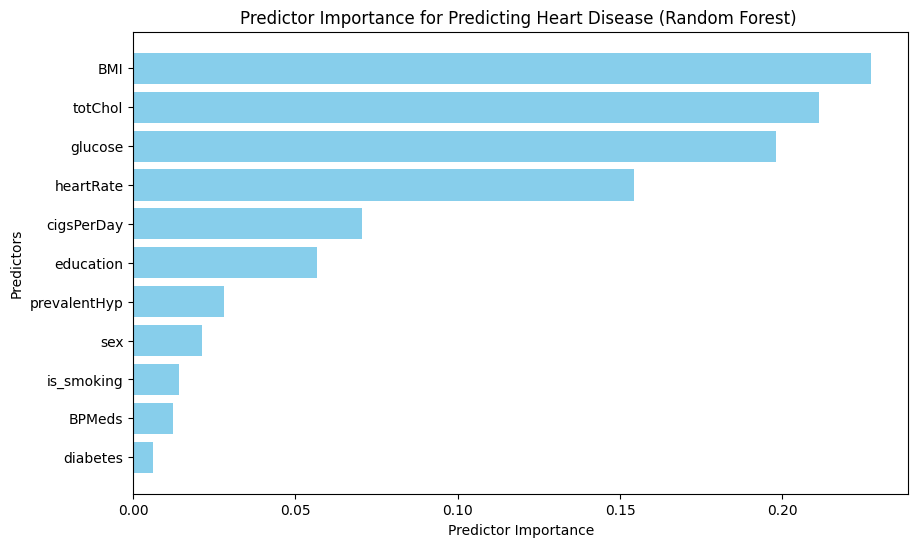

     Predictor  Importance
8          BMI    0.227338
7      totChol    0.211193
10     glucose    0.198079
9    heartRate    0.154351
3   cigsPerDay    0.070404


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Preprocessing
# Drop unwanted columns: 'Prevalent Stroke', 'id', 'Sys BP', 'Dia BP', and the target variable
X = df.drop(columns=["prevalentStroke", "id", "sysBP", "diaBP", "TenYearCHD", "age"])

# Encode categorical variables
categorical_columns = ["sex", "is_smoking", "education"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Target variable
y = df["TenYearCHD"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Predictor": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Predictor"], importance_df["Importance"], color="skyblue")
plt.xlabel("Predictor Importance")
plt.ylabel("Predictors")
plt.title("Predictor Importance for Predicting Heart Disease (Random Forest) ")
plt.gca().invert_yaxis()
plt.show()

# Display top predictors
print(importance_df.head())


<ipython-input-4-1fce4827948e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='BMI', data=df, palette='coolwarm')


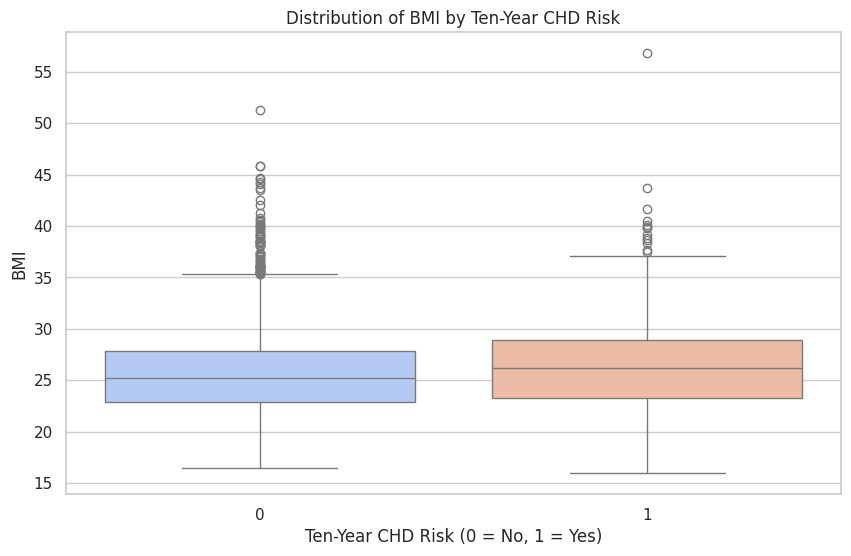

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure sysBP is standardized
sns.set(style="whitegrid")

# Boxplot to show distribution of sysBP by TenYearCHD
plt.figure(figsize=(10, 6))
sns.boxplot(x='TenYearCHD', y='BMI', data=df, palette='coolwarm')
plt.title('Distribution of BMI by Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


<ipython-input-5-f7157ad2d056>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='coolwarm')


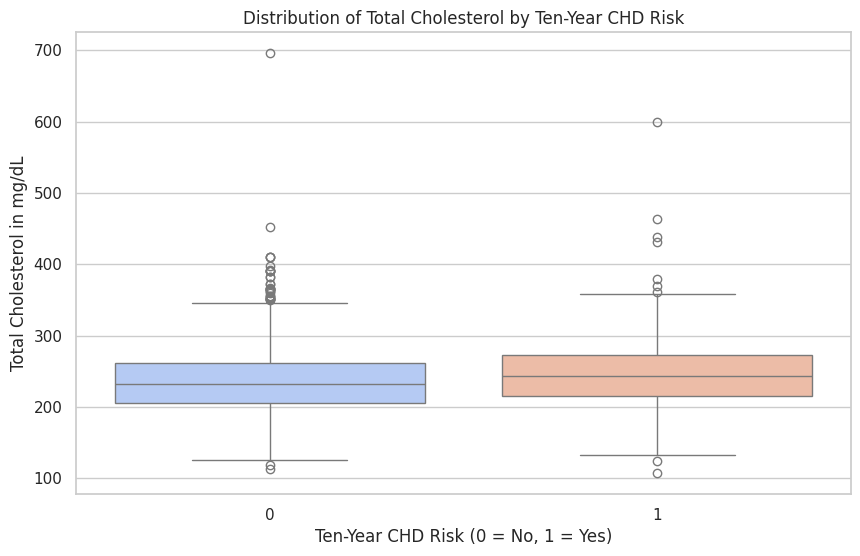

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure BMI is standardized
sns.set(style="whitegrid")

# Boxplot to show distribution of BMI by TenYearCHD
plt.figure(figsize=(10, 6))
sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='coolwarm')
plt.title('Distribution of Total Cholesterol by Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Total Cholesterol in mg/dL')
plt.show()

<ipython-input-6-9ddd49e95256>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='glucose', data=df, palette='coolwarm')


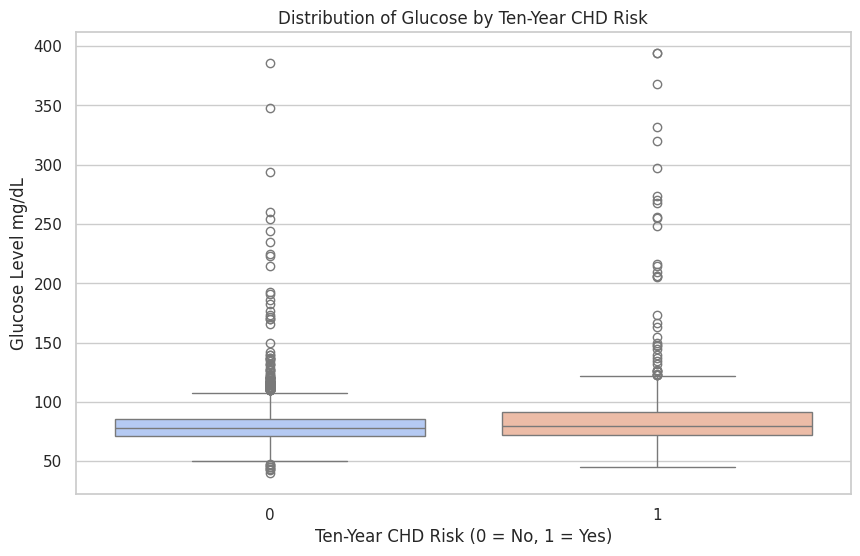

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure totChol is standardized
sns.set(style="whitegrid")

# Boxplot to show distribution of totChol by TenYearCHD
plt.figure(figsize=(10, 6))
sns.boxplot(x='TenYearCHD', y='glucose', data=df, palette='coolwarm')
plt.title('Distribution of Glucose by Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level mg/dL')
plt.show()